In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mnist_test.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(10000, 785)

In [6]:
sr=df.sample(500)

In [7]:
sr

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8286,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6895,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4428,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7121,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3690,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1442,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sr.shape

(500, 785)

In [9]:
import seaborn as sns

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

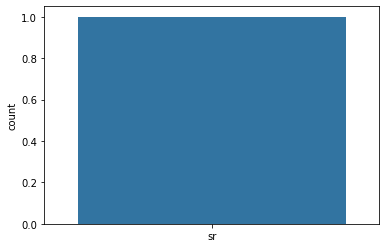

In [10]:
sns.countplot(['sr'])

In [13]:
x=sr.iloc[:,1:]
y=sr.iloc[:,0]
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y.head()

8286    1
6895    9
4780    0
4428    1
7121    8
Name: label, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,stratify=y)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
steps=[('scaler',StandardScaler()),('SVM',SVC(kernel='poly'))]
pipeline=Pipeline(steps)

from sklearn.model_selection import GridSearchCV
parameters={'SVM__C':[0.001,0.1,100,10e5],'SVM__gamma':[10,1,0.1,0.01]}

In [30]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5)

In [31]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             param_grid={'SVM__C': [0.001, 0.1, 100, 1000000.0],
                         'SVM__gamma': [10, 1, 0.1, 0.01]})

In [34]:
print("score=%3.2f"%(grid.score(X_test,y_test)))
print("best_parameters= ",grid.best_params_)

score=0.72
best_parameters=  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [35]:
y_pred=grid.predict(X_test)

In [36]:
print(y_pred[100:105])
print(y_test[100:105])

[]
Series([], Name: label, dtype: int64)


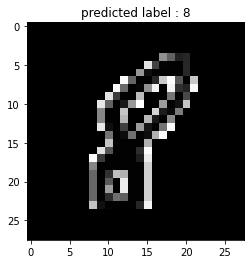

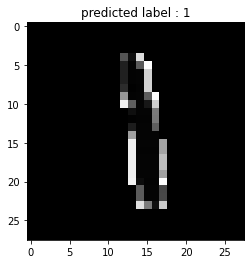

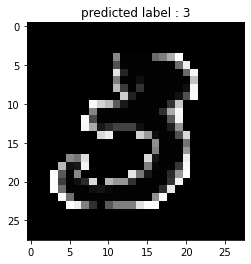

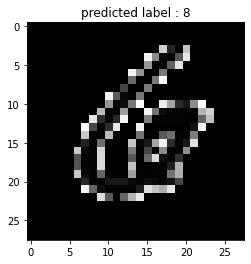

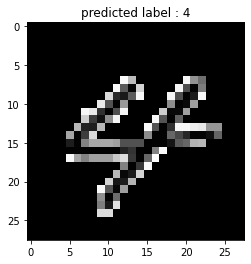

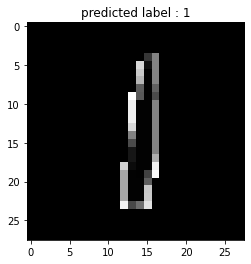

In [45]:
for i in (np.random.randint(0,99,6)):
    two_d=(np.reshape(X_test.values[i],(28,28))*255).astype(np.uint8)
    plt.title('predicted label : {0}'.format(y_pred[i]))
    plt.imshow(two_d,interpolation='nearest',cmap='gray')
    plt.show()